<a href="https://colab.research.google.com/github/Dexduo/Metodos_Numericos_2/blob/main/Tarefa_1-2/MN2_tarefa1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
path_to_img = "/content/drive/MyDrive/UFC - Universidade Federal do Ceará/CC - CIÊNCIA DA COMPUTAÇÃO/UFC CC 13º SEMESTRE/Métodos Numéricos 2/cobras_fumantes.jpg"
img = cv2.imread(path_to_img, cv2.IMREAD_GRAYSCALE)

In [ ]:
print(img)

[[170 159 135 ...  48  55  61]
 [119 100  71 ...  44  50  56]
 [ 68  50  27 ...  45  51  56]
 ...
 [ 86  80  76 ... 122  97 112]
 [ 88  84  81 ... 108 105 154]
 [ 94  90  88 ... 105 132 189]]


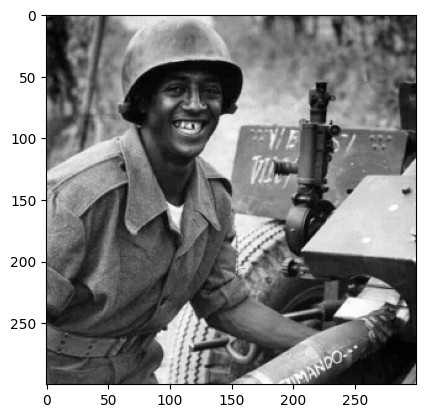

In [ ]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

**Inserindo uma borda para a passagem correta do filtro 3x3**

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 170, 159, ...,  55,  61,   0],
       [  0, 119, 100, ...,  50,  56,   0],
       ...,
       [  0,  88,  84, ..., 105, 154,   0],
       [  0,  94,  90, ..., 132, 189,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
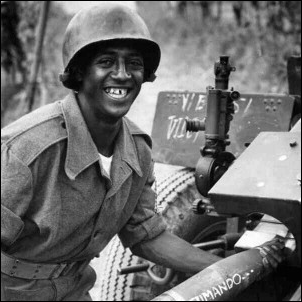

In [ ]:
img = np.insert(img, 0, 0, axis=1)
img = np.insert(img, img.shape[1], 0, axis=1)
img = np.insert(img, 0, 0, axis=0)
img = np.insert(img, img.shape[0], 0, axis=0)
img

In [ ]:
print(img)

[[  0   0   0 ...   0   0   0]
 [  0 170 159 ...  55  61   0]
 [  0 119 100 ...  50  56   0]
 ...
 [  0  88  84 ... 105 154   0]
 [  0  94  90 ... 132 189   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
gaussian = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]])

gaussian = gaussian.flatten() # na multiplicacao elemento por elemento o metodo multiply precisa
                              # que os arrays estejam em 1 dimensao

In [ ]:
new_img = np.ndarray(shape=(300, 300), dtype=int)

In [ ]:
for i in range(0, img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, img.shape[1]-2):
    piece_img = img[i:i+3, j:j+3]
    new_img[i-1][j-1] = round(np.sum(np.multiply(gaussian, piece_img.flatten()))/16) # divide por 16 pois é caracteristica do filtro gaussiano

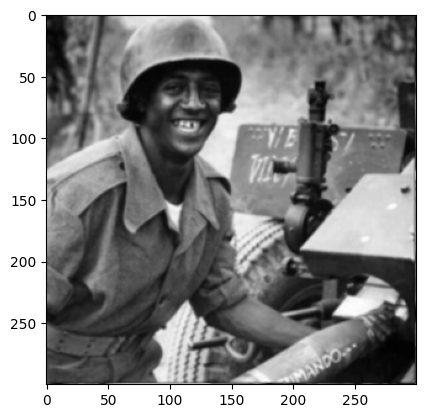

In [ ]:
#f, axarr = plt.subplots(2)
#axarr[0].imshow(new_img, cmap='gray', vmin=0, vmax=255)
#axarr[1].imshow(img, cmap='gray', vmin=0, vmax=255)
#plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

**Vamos agora aplicar o filtro gradiente que se divide em dois passos: aplicar filtro de sobel para direção x e depois filtro de sobel para a direção y**

In [ ]:
sobel_x = np.array(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]]
)

sobel_x = sobel_x.flatten()

sobel_y = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)

sobel_y = sobel_y.flatten()

img_sobel_x = np.ndarray(shape=(300, 300), dtype=int)
img_sobel_y = np.ndarray(shape=(300, 300), dtype=int)

In [ ]:
for i in range(0, new_img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, new_img.shape[1]-2):
    piece_img = new_img[i:i+3, j:j+3]
    img_sobel_x[i-1][j-1] = round(np.sum(np.multiply(sobel_x, piece_img.flatten()))) #

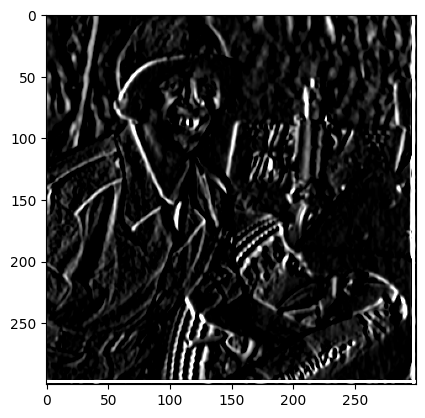

In [ ]:
plt.imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255)

In [ ]:
for i in range(0, new_img.shape[0]-2):# -2 porque como o filtro é 3x3 se formos alem disso ultrapassa o tamanho
  for j in range(0, new_img.shape[1]-2):
    piece_img = new_img[i:i+3, j:j+3]
    img_sobel_y[i-1][j-1] = round(np.sum(np.multiply(sobel_y, piece_img.flatten()))) #

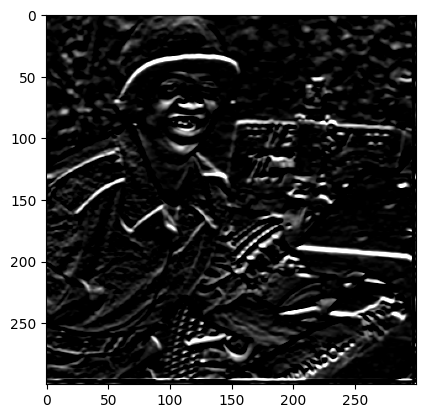

In [ ]:
plt.imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255)

In [ ]:
img_sobel_x = img_sobel_x**2

img_sobel_y = img_sobel_y**2

In [ ]:
teste = np.array([[  4,   9,   1],
       [ 25, 100,   9],
       [  4,  64,  81]])

teste2 = np.array([[  1,   1,   1],
       [ 1, 1,   1],
       [  1,  1,  1]])

np.add(teste, teste2)

array([[  5,  10,   2],
       [ 26, 101,  10],
       [  5,  65,  82]])